In [29]:
#Neural Network classification with Pytorch

#classification is a problem of predicting weather something is one thing or another(there can be multiple things as the options)

#Make classification data and get it ready

import sklearn
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

#create circles
X,y=make_circles(n_samples,
                noise=0.3,
                random_state=42)

In [30]:
len(X),len(y)

(1000, 1000)

In [31]:
print(f"First 5 of X:{X[:5]}")
print(f"First 5 of y:{y[:5]}")

First 5 of X:[[ 0.59171471  0.43674853]
 [-0.45745002  0.36160118]
 [-1.01069349  0.83042101]
 [-0.87169639  0.41407292]
 [ 0.48803455 -0.87258708]]
First 5 of y:[1 1 1 1 0]


In [32]:
#Create a dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "label":y})
circles.head(10)

,X1,X2,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
5,-0.347874,1.103071,1
6,-0.046008,0.834056,1
7,0.610994,0.306608,1
8,-0.255312,-0.879601,1
9,0.025255,1.300938,0


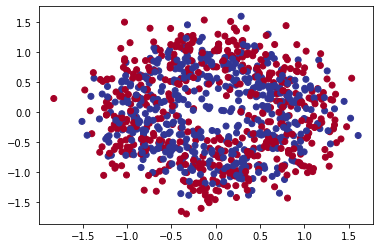

In [33]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],
                c=y,
                cmap=plt.cm.RdYlBu)

In [34]:
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [35]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [36]:
#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [38]:
#Model Building
#let's Build a model to classify our blue and red dots.
#1.Setup device agonastic code so our code will run on an accelerate(GPU) if there is one 
#2.Construct a Model by using `nn.Module` 
#3.Define loss function and optimizer
#4.Create training and testing loop

In [39]:
import torch
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [40]:
#Now we've setup device agnostic code,let's create a model:
#1.subclass `nn.Module`(almost all models of pytorch subclass nn.Module)
#2.Create 2 nn.Linear() layers that are capable of handling the shapes of our data
#3.Define a forward() method that outlines the forward pass(or forward computation) of the model
#4.instatiate an instance of our model class and send it to target device 

In [41]:
from sklearn import datasets
#1.Construct a model that subclass nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        #2.Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer_1=nn.Linear(in_features=2,out_features=5) #takes 2 features and upscale to 5 features
        self.layer_2=nn.Linear(in_features=5,out_features=1) #takes 5 features from previous layer and output a single feature(same shape as y)
    
    #3.Define a forward() method that outlines the forward pass    
    def forward(self,x):
       return self.layer_2(self.layer_1(x)) #x----->layer1----->layer2----->output
 
#4.Instatiate an instance of our model class and send it to the target device   
model_0=CircleModelv0().to(device)
model_0

   

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [42]:
#or u can create model like this also
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__()
        self.two_layers_seq=nn.Sequential(
            nn.Linear(in_features=2,out_features=5),
            nn.Linear(in_features=5,out_features=1)
        )
    
    def forward(self,x):
        return self.two_layers_seq
    
model_1=CircleModelv1().to(device)
model_1

CircleModelv1(
  (two_layers_seq): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [43]:
#Let's replicate the model above using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [44]:
next(model_0.parameters()).device


device(type='cpu')

In [45]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3526, -0.2125],
                      [-0.5974, -0.3064],
                      [ 0.3084,  0.6531],
                      [-0.6077,  0.7031],
                      [-0.4254,  0.3545]])),
             ('0.bias', tensor([-0.4345, -0.4676,  0.3521,  0.2002,  0.7061])),
             ('1.weight',
              tensor([[ 0.1847, -0.3707,  0.2148,  0.0013, -0.0980]])),
             ('1.bias', tensor([-0.4055]))])

In [46]:
#define a loss function
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss=sigmoid activation function built-in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [47]:
#claculate the accuracy-out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    print(correct)
    return acc

print(correct)

NameError: name 'correct' is not defined

In [ ]:
#Train Model
#1.Forwardpass
#2.Calculate the loss
#3.Optimizer zero grade
#4.loss Backward(Backpropgation)
#5.Optimizer step (Gradient descent)

In [ ]:
#Going from raw logits.
#we cn convert these logits into prediction probabilities by passing them to some kind of activation function
# (eg:sigmoid for binary classification and softmax for multiclass classification)
#Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax().
 

In [ ]:
#view the first 5 outputs of the forward pass on the test data
model_0.eval()
with  torch.inference_mode():
    y_logits=model_0(X_test.to(device))[:5]
y_logits 
print(y_logits.squeeze()) 

tensor([ 0.5438,  0.2508,  0.4504,  0.5787, -0.1149])


In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#Use the sigmoid avtivation function on our model logits to turn them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6327],
        [0.5624],
        [0.6107],
        [0.6408],
        [0.4713]])

In [ ]:
#Find the predicted labels
y_preds=torch.round(y_pred_probs)

y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

print(y_preds.squeeze())
print(y_preds)

tensor([True, True, True, True, True])
tensor([1., 1., 1., 1., 0.])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])


In [ ]:
#Training the Model
torch.manual_seed(42)
#torch.cuda.manual_seed(42) #used when using the GPU
epochs=100

'''X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)''' #------> while using GPU

for epoch in range(epochs):
    #Training
    model_0.train()
    
    #1.Forward pass
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits)) #turn logits----->pred probs----->pred labels
    
    
    #2.Calculate the loss/accuracy
    #loss=loss_fn(torch.sigmoid(y_logits),y_train) #nn.BCELoss expects prediction prbobilities as input
    
    loss=loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input 
                 y_train)
    acc=accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
    
    #3.Optimizer zero grads
    optimizer.zero_grad()
    
    #l4.oss backward(backpropgation)
    loss.backward()
    
    #5.optimizer step (gradient descent)
    optimizer.step()
    
    
    #Testing
    model_0.eval()
    with torch.inference_mode():
        #Forward pass
        test_logits=model_0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        #loss function
        test_loss=loss_fn(test_logits,
                         y_test)
        test_acc=accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
        
     #Print what happenning
    if epoch%10==0:
        print(f"Epoch:{epoch} | Training Loss:{loss:.5f} | Training accuracy:{acc:.2f}% | Test Loss{test_loss:.5f} | Testing accuracy: {test_acc:.2f}%")
        
    
    
    

Epoch:0 | Training Loss:0.69430 | Training accuracy:51.50% | Test Loss0.69638 | Testing accuracy: 50.00%
Epoch:10 | Training Loss:0.69407 | Training accuracy:51.25% | Test Loss0.69607 | Testing accuracy: 50.00%
Epoch:20 | Training Loss:0.69389 | Training accuracy:51.00% | Test Loss0.69582 | Testing accuracy: 50.00%
Epoch:30 | Training Loss:0.69373 | Training accuracy:50.62% | Test Loss0.69561 | Testing accuracy: 50.50%
Epoch:40 | Training Loss:0.69361 | Training accuracy:50.75% | Test Loss0.69543 | Testing accuracy: 51.00%
Epoch:50 | Training Loss:0.69350 | Training accuracy:50.12% | Test Loss0.69528 | Testing accuracy: 50.50%
Epoch:60 | Training Loss:0.69342 | Training accuracy:50.12% | Test Loss0.69515 | Testing accuracy: 51.00%
Epoch:70 | Training Loss:0.69335 | Training accuracy:50.12% | Test Loss0.69504 | Testing accuracy: 51.50%
Epoch:80 | Training Loss:0.69329 | Training accuracy:50.25% | Test Loss0.69495 | Testing accuracy: 51.00%
Epoch:90 | Training Loss:0.69324 | Training acc

In [ ]:
import requests
from pathlib import Path

#Downloading the helper function
if Path("helper_function.py").is_file():
    print("helper_function.py already exist")
else:
    print("Download helper_function.py ")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)
        
    

helper_function.py already exist


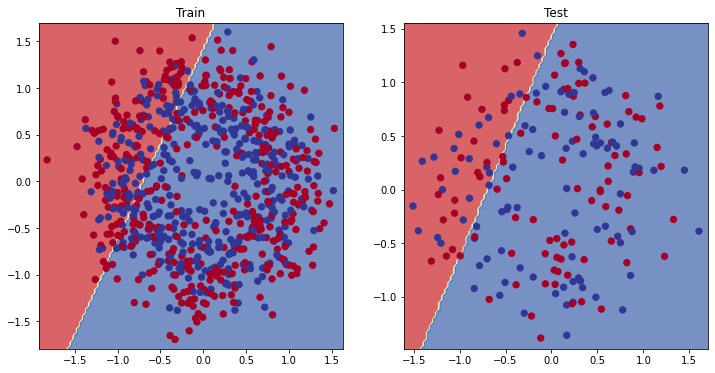

In [ ]:
from helper_function import plot_predictions,plot_decision_boundary
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [ ]:
#Improving the Model(from a model prespective)
#1.Add more layers-give the model more chances to learn about patterns in the data
#2.Add more hidden units-go from 5 hidden units to 10 hidden units 
#3.Fit for longer
#4.Changing the activation function
#5.Change the learning rate
#6.Change the loss function

#These options are all from a model's  prespective  because they deal directly with the model,rather then the data




In [51]:
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__ () 
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        
        
    def forward(self,x):
       # z=self.layer_1(x)  
       # z=self.layer_2(z)
       # z=self.layer_3(z)
    	return self.layer_3(self.layer_2(self.layer_1(x)))
model_1=CircleModelv1()
model_1
    

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [53]:
#Loss function
loss_fn=nn.BCEWithLogitsLoss()

#Optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                         lr=0.1)

In [54]:
X_train.dtype

torch.float32

In [57]:
torch.manual_seed(42)
Epochs=2000

#Training loop
for epoch in range(Epochs):
    model_1.train()
    y_logits=model_1(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    
    loss=loss_fn(y_logits,y_train)
    train_accuracy=accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
	#Testing
    model_1.eval()
    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        loss_test=loss_fn(test_logits,y_test)
        test_accuracy=accuracy_fn(y_true=y_test,y_pred=test_pred)
        
        
    if epoch%10==0:
        print(f"Epochs:{epoch} | Training loss:{loss:.5f} | Training accuracy:{train_accuracy:.2f} | Testing loss:{loss_test:.5f} | Testing accuracy:{test_accuracy:.2f}")

416
99
Epochs:0 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
Epochs:10 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
Epochs:20 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
Epochs:30 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
Epochs:40 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
416
99
Epochs:50 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49

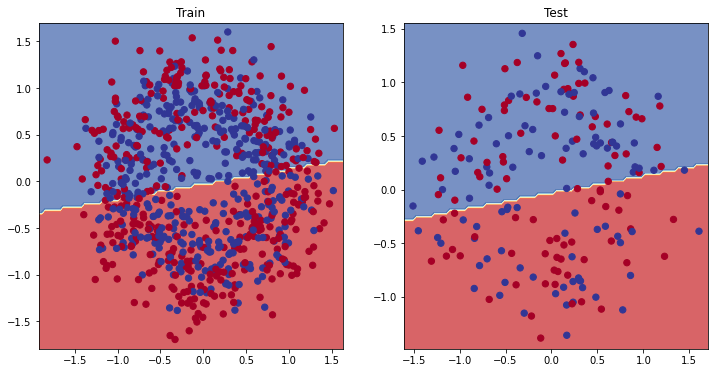

In [58]:
from helper_function import plot_predictions,plot_decision_boundary
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [59]:
#prepare data to see if our model can fit a straight line

weight=0.7
bias=0.3
start=0
end=1
step=0.01
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias

print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [60]:
train_split=int(0.8*len(X_regression))
X_train_regerssion,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regerssion=X_regression[train_split:],y_regression[train_split:]

len(X_train_regerssion),len(y_train_regression),len(X_test_regression),len(y_test_regerssion)

(80, 80, 20, 20)

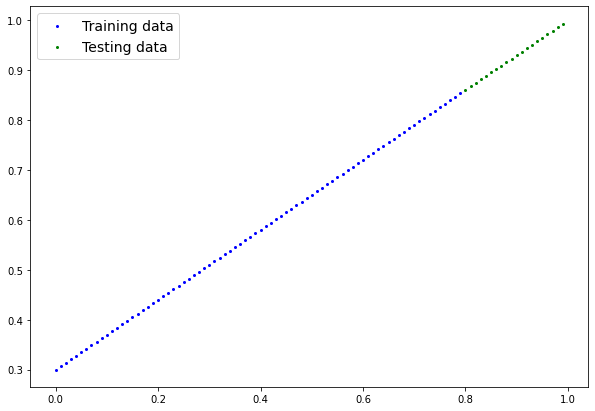

In [61]:
plot_predictions(train_data=X_train_regerssion,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regerssion)

In [62]:
#Adjust model_1 to fit a straight line
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [64]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [69]:
torch.manual_seed(42)
Epochs=1000
#training
for epoch in range(Epochs):
    model_2.train()
    y_pred=model_2(X_train_regerssion)
    train_loss=loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    #testing
    model_2.eval()
    with torch.inference_mode():
        y_test_pred=model_2(X_test_regression)
        test_loss=loss_fn(y_test_pred,y_test_regerssion)
        
    if epoch%10==0:
        print(f"Epochs:{epoch} | Training loss:{train_loss} | Tesing loss:{test_loss}")


Epochs:0 | Training loss:0.02857953868806362 | Tesing loss:0.0008127212640829384
Epochs:10 | Training loss:0.02962152101099491 | Tesing loss:0.001970785902813077
Epochs:20 | Training loss:0.027476418763399124 | Tesing loss:0.0009100675815716386
Epochs:30 | Training loss:0.028519142419099808 | Tesing loss:0.0018059223657473922
Epochs:40 | Training loss:0.028500845655798912 | Tesing loss:0.002456283662468195
Epochs:50 | Training loss:0.02743523195385933 | Tesing loss:0.0016933738952502608
Epochs:60 | Training loss:0.026376688852906227 | Tesing loss:0.0012298673391342163
Epochs:70 | Training loss:0.026369363069534302 | Tesing loss:0.0016242116689682007
Epochs:80 | Training loss:0.025322625413537025 | Tesing loss:0.0012472510570660233
Epochs:90 | Training loss:0.026363054290413857 | Tesing loss:0.0028388022910803556
Epochs:100 | Training loss:0.025325413793325424 | Tesing loss:0.0020920694805681705
Epochs:110 | Training loss:0.02532694861292839 | Tesing loss:0.0027183801867067814
Epochs:12

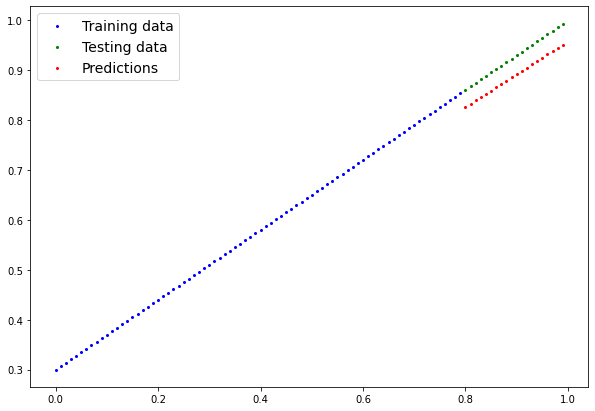

In [72]:
model_2.eval()
with torch.inference_mode():
    y_preds=model_2(X_test_regression)

plot_predictions(train_data=X_train_regerssion,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regerssion,
                 predictions=y_preds)
